In [69]:
import pandas as pd

# Load the dataset
file_path = '1.Stock market Prediction.csv'
df = pd.read_csv(file_path)


In [70]:
# Display the first few rows of the dataframe
print(df.head())

# Display basic information about the dataframe
print(df.info())

# Display descriptive statistics
print(df.describe())


         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN             

In [71]:
df['date'] = pd.to_datetime(df['date'])

In [72]:
# Identifying Trends

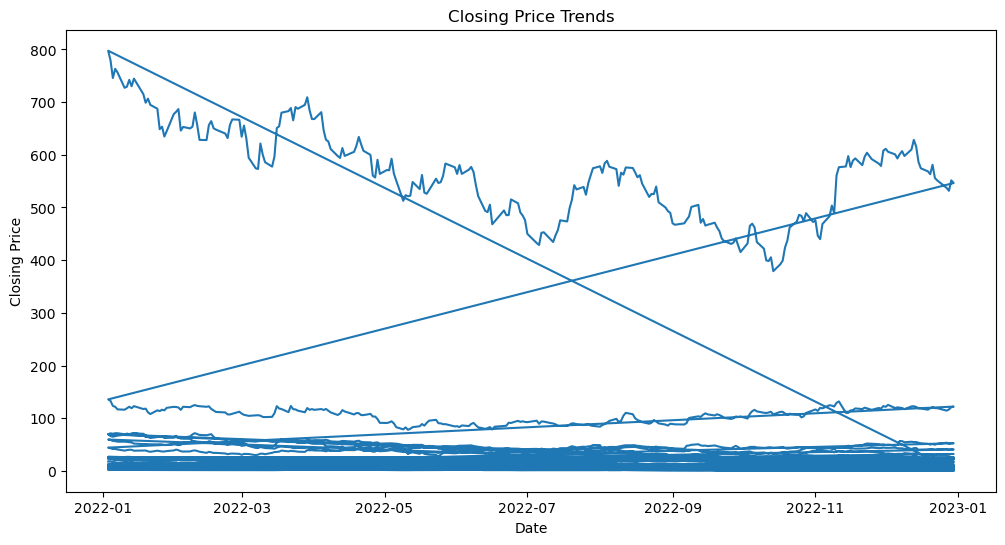

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the closing price trends over time
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['close'])
plt.title('Closing Price Trends')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()



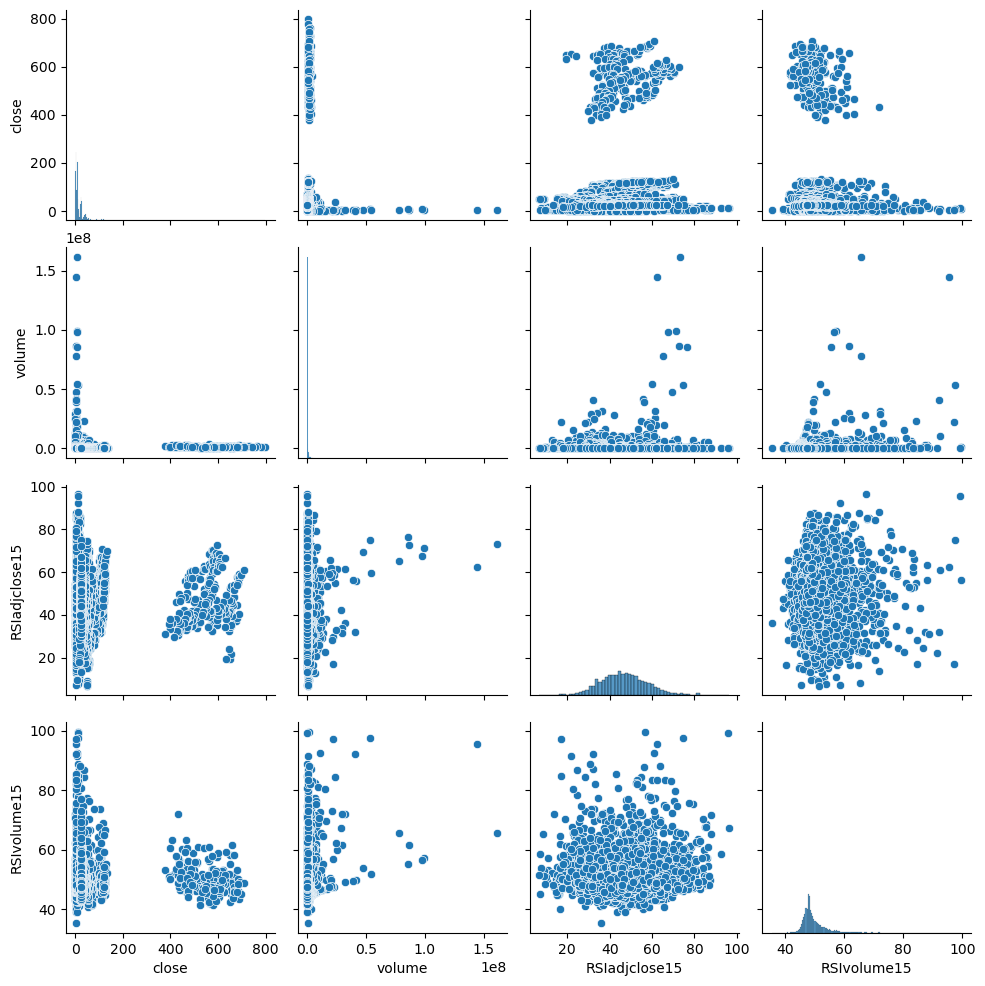

In [74]:
# Select a subset of columns for pairplot
selected_columns = ['close', 'volume', 'RSIadjclose15', 'RSIvolume15']
sns.pairplot(df[selected_columns])
plt.show()

In [75]:
# Filling missing values using the forward fill method
df.fillna(method='ffill', inplace=True)

# Create moving average features
df['MA10'] = df['close'].shift(1).rolling(window=10).mean()
df['MA50'] = df['close'].shift(1).rolling(window=50).mean()

# Ensure no NaN values after calculating moving averages
df.fillna(method='bfill', inplace=True)

In [76]:
## Splitting the data

In [77]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Separate features and target
X_train = train[['MA10', 'MA50']]
y_train = train['close']
X_test = test[['MA10', 'MA50']]
y_test = test['close']

# Ensure no NaN values in training and testing sets
X_train.fillna(method='ffill', inplace=True)
X_test.fillna(method='ffill', inplace=True)

/var/folders/yw/lxvknzcj44vffnlznf_qky7r0000gn/T/ipykernel_93863/598890801.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(method='ffill', inplace=True)
/var/folders/yw/lxvknzcj44vffnlznf_qky7r0000gn/T/ipykernel_93863/598890801.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(method='ffill', inplace=True)


In [78]:
# Linear Regression Model

Mean Squared Error: 13.986787714050577


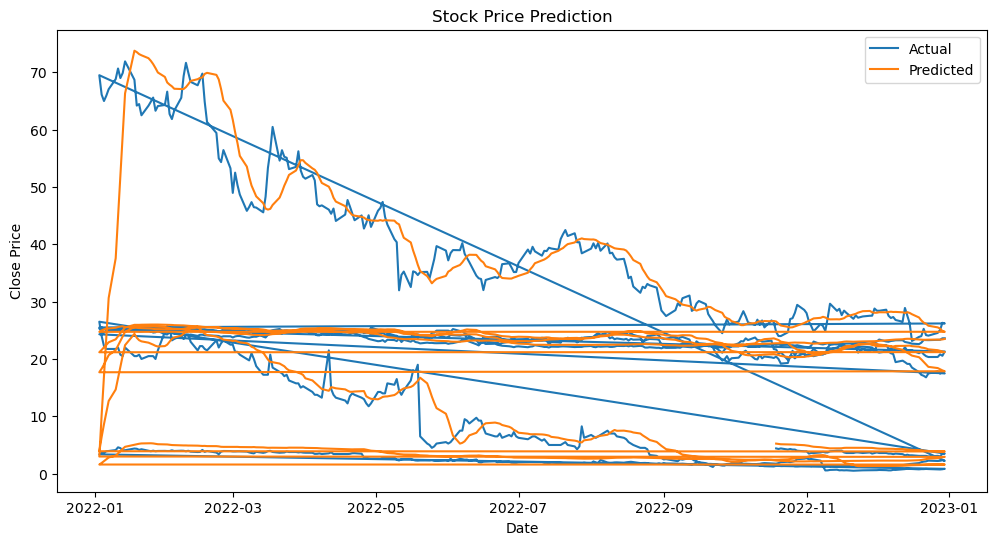

In [79]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(test['date'], y_test, label='Actual')
plt.plot(test['date'], predictions, label='Predicted')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()